<h1><center>PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS

###Pós-graduação Lato Sensu em Ciência de Dados e Big Data

###Trabalho de Conclusão de curso

####Título: Aplicação das Teorias de Sharpe e Markowitz utilizando Aprendizado de Máquina

####Aluno: Lucas Guimarães de Souza Ribeiro</h1><center>

In [ ]:
#Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data as wb
from datetime import datetime
import seaborn as sns

In [ ]:
#Importação dos preços das ações do estudo

tickers = ['ABEV3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BIDI11.SA',
           'BPAC11.SA', 'BRAP4.SA', 'BRDT3.SA','BRFS3.SA', 'BRKM5.SA', 'BRML3.SA', 'BRSR6.SA', 'BTOW3.SA', 'CCRO3.SA',
           'CESP6.SA', 'CIEL3.SA', 'CMIG3.SA', 'CMIG4.SA', 'CPFE3.SA', 'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSMG3.SA',
           'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DTEX3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA',
           'ENAT3.SA', 'ENBR3.SA', 'ENGI11.SA', 'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GFSA3.SA', 'GGBR4.SA', 'GNDI3.SA',
           'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HGTX3.SA', 'HYPE3.SA', 'IGTA3.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA',
           'JBSS3.SA', 'KLBN11.SA','LAME4.SA', 'LCAM3.SA', 'LIGT3.SA', 'LINX3.SA', 'LREN3.SA', 'MDIA3.SA',
           'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'MYPK3.SA', 'ODPV3.SA', 'PETR3.SA',
           'PETR4.SA', 'PSSA3.SA', 'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA', 'RAPT4.SA', 'RENT3.SA', 'SANB11.SA', 'SAPR11.SA',
           'SBSP3.SA', 'SEER3.SA', 'SLCE3.SA', 'SMLS3.SA', 'SULA11.SA', 'SUZB3.SA', 'TAEE11.SA', 'TEND3.SA', 'TIET11.SA',
           'TOTS3.SA', 'TRPL4.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VVAR3.SA', 'WEGE3.SA', 
           'YDUQ3.SA']


ações = pd.DataFrame()

for t in tickers:
    ações[t] = wb.DataReader(t, data_source= 'yahoo', start = '2013-01-01', end = '2020-12-30')['Adj Close']
    

In [ ]:
ações

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BIDI11.SA,BPAC11.SA,...,TEND3.SA,TIET11.SA,TOTS3.SA,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,12.468795,NaN,10.370103,15.510180,9.985571,9.860705,NaN,9.790003,NaN,NaN,...,4.682553,NaN,35.998219,2.519516,16.550079,12.690379,30.560415,3.835596,6.328155,10.195735
2013-01-03,12.689861,NaN,10.370103,15.816780,10.533898,10.449396,NaN,9.755225,NaN,NaN,...,4.682553,NaN,35.927891,2.534558,16.362177,12.671222,30.040678,3.835596,6.611505,10.058148
2013-01-04,12.480665,NaN,10.179018,15.624401,10.508274,10.273964,NaN,9.737836,NaN,NaN,...,4.682553,NaN,35.049458,2.662414,16.694620,12.019943,29.576387,3.835596,6.532797,10.005606
2013-01-07,12.624581,NaN,10.127574,15.720593,10.260590,10.221881,NaN,9.737836,NaN,NaN,...,4.682553,NaN,35.040749,2.646620,16.983707,11.790081,28.994282,3.835596,6.454087,10.108213
2013-01-08,12.609744,NaN,10.215766,15.900935,10.226425,10.257515,NaN,9.729141,NaN,NaN,...,4.682553,NaN,35.269135,2.530796,17.055979,11.406976,28.765596,3.835596,6.195480,10.353362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,15.436431,35.270000,58.962151,37.528252,21.679346,24.156189,28.675234,9.915247,100.643456,92.282791,...,29.190001,16.199364,27.660000,25.871700,22.819044,13.970000,83.191544,15.940000,72.460342,32.200001
2020-12-23,15.426478,37.700001,58.678493,38.145721,22.142693,24.708843,28.645733,9.663638,101.213303,92.421814,...,28.990000,16.109478,27.809999,26.115950,23.161087,14.620000,83.593437,16.129999,72.261337,32.910000
2020-12-28,15.695198,37.770000,60.155479,38.567165,22.329817,24.949509,29.235758,9.589087,101.903122,94.556839,...,28.900000,16.678755,28.129999,26.294441,23.356537,14.460000,83.545586,16.590000,75.127106,33.080002


### Verifica coluna a coluna se existe valores NaN

In [ ]:
print(ações.isnull().any())

ABEV3.SA    False
AZUL4.SA     True
B3SA3.SA    False
BBAS3.SA    False
BBDC3.SA    False
            ...  
USIM5.SA    False
VALE3.SA    False
VVAR3.SA    False
WEGE3.SA    False
YDUQ3.SA    False
Length: 95, dtype: bool


### Retira todas as linhas com valores NaN

In [ ]:
ações_new = ações.dropna(axis =1)

In [ ]:
ações_new

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BEEF3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,...,TAEE11.SA,TEND3.SA,TOTS3.SA,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,12.468795,10.370103,15.510180,9.985571,9.860705,9.790003,22.413336,39.980278,9.456411,15.823524,...,9.793619,4.682553,35.998219,2.519516,16.550079,12.690379,30.560415,3.835596,6.328155,10.195735
2013-01-03,12.689861,10.370103,15.816780,10.533898,10.449396,9.755225,22.177610,40.521183,9.657761,15.857737,...,9.951582,4.682553,35.927891,2.534558,16.362177,12.671222,30.040678,3.835596,6.611505,10.058148
2013-01-04,12.480665,10.179018,15.624401,10.508274,10.273964,9.737836,21.745451,40.791634,9.560557,15.795011,...,10.312634,4.682553,35.049458,2.662414,16.694620,12.019943,29.576387,3.835596,6.532797,10.005606
2013-01-07,12.624581,10.127574,15.720593,10.260590,10.221881,9.737836,20.953159,41.127373,9.435583,15.629649,...,10.560860,4.682553,35.040749,2.646620,16.983707,11.790081,28.994282,3.835596,6.454087,10.108213
2013-01-08,12.609744,10.215766,15.900935,10.226425,10.257515,9.729141,20.953159,40.884895,9.414756,15.481395,...,10.375822,4.682553,35.269135,2.530796,17.055979,11.406976,28.765596,3.835596,6.195480,10.353362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,15.436431,58.962151,37.528252,21.679346,24.156189,9.915247,61.916553,22.219999,23.070000,9.850000,...,32.959999,29.190001,27.660000,25.871700,22.819044,13.970000,83.191544,15.940000,72.460342,32.200001
2020-12-23,15.426478,58.678493,38.145721,22.142693,24.708843,9.663638,62.137405,22.389999,23.240000,10.010000,...,32.950001,28.990000,27.809999,26.115950,23.161087,14.620000,83.593437,16.129999,72.261337,32.910000
2020-12-28,15.695198,60.155479,38.567165,22.329817,24.949509,9.589087,62.089397,22.450001,23.030001,10.250000,...,33.630001,28.900000,28.129999,26.294441,23.356537,14.460000,83.545586,16.590000,75.127106,33.080002


### Verifica se todas as colunas com valores nulos foram eliminadas

In [ ]:
ações_new.notnull().all()

ABEV3.SA    True
B3SA3.SA    True
BBAS3.SA    True
BBDC3.SA    True
BBDC4.SA    True
            ... 
USIM5.SA    True
VALE3.SA    True
VVAR3.SA    True
WEGE3.SA    True
YDUQ3.SA    True
Length: 78, dtype: bool

### Cria um dataframe com o retorno diário

In [ ]:
retorno_diario = ações_new.pct_change()
retorno_diario.dropna()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BEEF3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,...,TAEE11.SA,TEND3.SA,TOTS3.SA,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-03,0.017730,0.000000,0.019768,0.054912,0.059701,-0.003552,-0.010517,0.013529,0.021292,0.002162,...,0.016129,0.000000,-0.001954,0.005970,-0.011354,-0.001510,-0.017007,0.000000,0.044776,-0.013495
2013-01-04,-0.016485,-0.018427,-0.012163,-0.002433,-0.016789,-0.001783,-0.019486,0.006674,-0.010065,-0.003956,...,0.036281,0.000000,-0.024450,0.050445,0.020318,-0.051398,-0.015455,0.000000,-0.011905,-0.005224
2013-01-07,0.011531,-0.005054,0.006157,-0.023570,-0.005069,0.000000,-0.036435,0.008231,-0.013072,-0.010469,...,0.024070,0.000000,-0.000248,-0.005932,0.017316,-0.019123,-0.019681,0.000000,-0.012049,0.010255
2013-01-08,-0.001175,0.008708,0.011472,-0.003330,0.003486,-0.000893,0.000000,-0.005896,-0.002207,-0.009485,...,-0.017521,0.000000,0.006518,-0.043763,0.004255,-0.032494,-0.007887,0.000000,-0.040069,0.024252
2013-01-09,0.015414,0.007194,0.009452,0.022272,0.012827,0.000894,-0.001562,0.032162,-0.017699,0.011050,...,-0.001305,0.000000,0.002987,0.010402,-0.002119,-0.000840,0.004577,0.000000,0.007622,0.027071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,0.005837,0.021695,0.013231,0.015866,0.020331,0.041096,-0.010891,0.018799,-0.008595,-0.023786,...,0.000000,-0.007143,-0.012143,0.002913,0.006899,-0.018961,0.000921,-0.013003,0.011248,-0.016494
2020-12-23,-0.000645,-0.004811,0.016453,0.021373,0.022878,-0.025376,0.003567,0.007651,0.007369,0.016244,...,-0.000303,-0.006852,0.005423,0.009441,0.014989,0.046528,0.004831,0.011920,-0.002746,0.022050
2020-12-28,0.017419,0.025171,0.011048,0.008451,0.009740,-0.007715,-0.000773,0.002680,-0.009036,0.023976,...,0.020637,-0.003105,0.011507,0.006835,0.008439,-0.010944,-0.000572,0.028518,0.039658,0.005166


### Calcula o retorno anual dos ativos

In [ ]:
retorno_anual = (retorno_diario.mean() * 252) 
retorno_anual

ABEV3.SA    0.064298
B3SA3.SA    0.294985
BBAS3.SA    0.218230
BBDC3.SA    0.164503
BBDC4.SA    0.183329
              ...   
USIM5.SA    0.205110
VALE3.SA    0.235085
VVAR3.SA    0.462668
WEGE3.SA    0.367924
YDUQ3.SA    0.274737
Length: 78, dtype: float64

### Calcula a variância anual dos ativos

In [ ]:
variancia_diaria = retorno_diario.var() 
variancia_diaria.head()

ABEV3.SA    0.000284
B3SA3.SA    0.000560
BBAS3.SA    0.000824
BBDC3.SA    0.000515
BBDC4.SA    0.000536
dtype: float64

### Calcula o desvio padrão dos ativos

In [ ]:
desv_anual = np.sqrt(variancia_diaria)
desv_anual.head()

ABEV3.SA    0.016862
B3SA3.SA    0.023666
BBAS3.SA    0.028714
BBDC3.SA    0.022687
BBDC4.SA    0.023145
dtype: float64

### Gráfico com as 10 menores volatividades

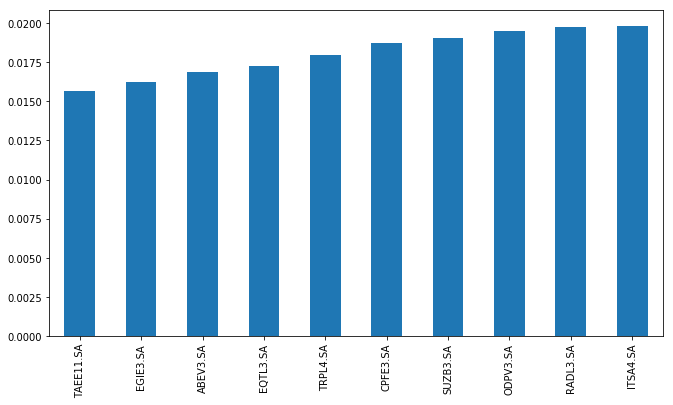

In [ ]:
desv_anual.sort_values(ascending=True).head(10).plot(kind='bar', figsize=(11,6))
plt.show()

### Gráfico com os 10 maiores retornos 

[]

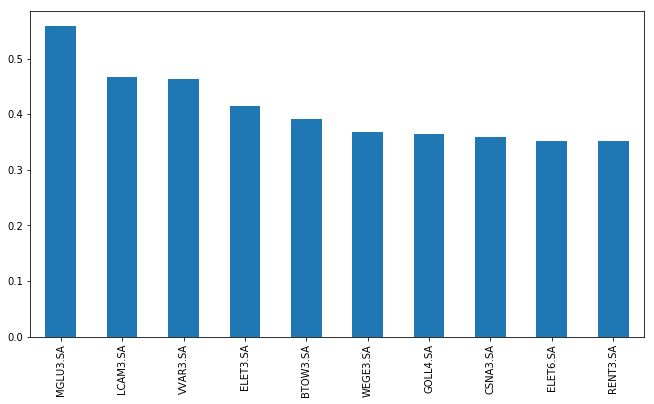

In [ ]:
retorno_anual.sort_values(ascending=False).head(10).plot(kind='bar',figsize=(11,6))
plt.plot()

In [ ]:
retorno_diario_anual = retorno_diario.mean()
retorno_diario_anual.head()

ABEV3.SA    0.000255
B3SA3.SA    0.001171
BBAS3.SA    0.000866
BBDC3.SA    0.000653
BBDC4.SA    0.000727
dtype: float64

### Cálculo do Índice de Sharpe

In [ ]:
selic = 2.75/100
selic

0.0275

In [ ]:
sharpe = (retorno_anual - selic) / desv_anual
sharpe

ABEV3.SA     2.182339
B3SA3.SA    11.302521
BBAS3.SA     6.642440
BBDC3.SA     6.038849
BBDC4.SA     6.732622
              ...    
USIM5.SA     4.573651
VALE3.SA     7.125465
VVAR3.SA     9.252572
WEGE3.SA    16.662516
YDUQ3.SA     7.819859
Length: 78, dtype: float64

In [ ]:
best = pd.DataFrame(sharpe)
best


,0
ABEV3.SA,2.182339
B3SA3.SA,11.302521
BBAS3.SA,6.642440
BBDC3.SA,6.038849
BBDC4.SA,6.732622
...,...
USIM5.SA,4.573651
VALE3.SA,7.125465
VVAR3.SA,9.252572
WEGE3.SA,16.662516


In [ ]:
best.columns = ['Sharpe']
best.sort_values(by='Sharpe', ascending=False, inplace=True)
best.head(10)

,Sharpe
EQTL3.SA,17.312926
TRPL4.SA,17.230194
WEGE3.SA,16.662516
LCAM3.SA,14.710590
RADL3.SA,13.811100
RENT3.SA,12.578212
TEND3.SA,12.467696
B3SA3.SA,11.302521
LREN3.SA,10.904534
ELET3.SA,10.545001


In [ ]:
select = best.iloc[0:10]
select

,Sharpe
EQTL3.SA,17.312926
TRPL4.SA,17.230194
WEGE3.SA,16.662516
LCAM3.SA,14.710590
RADL3.SA,13.811100
RENT3.SA,12.578212
TEND3.SA,12.467696
B3SA3.SA,11.302521
LREN3.SA,10.904534
ELET3.SA,10.545001


In [ ]:
x = list(select.index)
x

['EQTL3.SA',
 'TRPL4.SA',
 'WEGE3.SA',
 'LCAM3.SA',
 'RADL3.SA',
 'RENT3.SA',
 'TEND3.SA',
 'B3SA3.SA',
 'LREN3.SA',
 'ELET3.SA']

In [ ]:
select = x
select_return = wb.get_data_yahoo(select, start='2013-01-01', end='2020-12-31')['Adj Close']

In [ ]:
select_return

Symbols,EQTL3.SA,TRPL4.SA,WEGE3.SA,LCAM3.SA,RADL3.SA,RENT3.SA,TEND3.SA,B3SA3.SA,LREN3.SA,ELET3.SA
Date,,,,,,,,,,
2013-01-02,2.388010,4.545372,7.067160,2.904081,4.356397,8.430719,4.682553,10.370103,11.354691,4.073360
2013-01-03,2.424178,4.572509,7.383599,2.856473,4.337858,8.376047,4.682553,10.370103,11.375893,4.224673
2013-01-04,2.296980,4.803169,7.295699,2.980254,4.282245,8.411038,4.682553,10.179018,11.361760,4.273094
2013-01-07,2.244604,4.774675,7.207800,2.856473,4.263706,8.220773,4.682553,10.127574,11.168155,4.230726
2013-01-08,2.219666,4.565724,6.918986,2.832669,4.263706,8.222958,4.682553,10.215766,11.108806,3.873626
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,22.650000,25.871700,72.460342,26.458525,25.351871,64.784401,29.190001,58.962151,43.082836,33.798374
2020-12-23,22.670000,26.115950,72.261337,27.478064,24.922350,66.501869,28.990000,58.678493,43.641838,34.409420
2020-12-28,23.040001,26.294441,75.127106,27.823286,25.182060,66.601723,28.900000,60.155479,43.891388,34.963177


In [ ]:
retorno_diario = select_return.pct_change().dropna()
retorno_diario.head()

Symbols,EQTL3.SA,TRPL4.SA,WEGE3.SA,LCAM3.SA,RADL3.SA,RENT3.SA,TEND3.SA,B3SA3.SA,LREN3.SA,ELET3.SA
Date,,,,,,,,,,
2013-01-03,0.015146,0.005970,0.044776,-0.016393,-0.004256,-0.006485,0.0,0.000000,0.001867,0.037147
2013-01-04,-0.052471,0.050445,-0.011905,0.043333,-0.012820,0.004178,0.0,-0.018427,-0.001242,0.011461
2013-01-07,-0.022802,-0.005932,-0.012048,-0.041534,-0.004329,-0.022621,0.0,-0.005054,-0.017040,-0.009915
2013-01-08,-0.011110,-0.043762,-0.040070,-0.008334,0.000000,0.000266,0.0,0.008708,-0.005314,-0.084406
2013-01-09,0.055618,0.010401,0.007622,0.008404,0.006522,-0.014627,0.0,0.007194,0.020735,0.028125


In [ ]:
retorno_anual = retorno_diario.mean() * 252
retorno_anual

Symbols
EQTL3.SA    0.326548
TRPL4.SA    0.255553
WEGE3.SA    0.353647
LCAM3.SA    0.402988
RADL3.SA    0.271015
RENT3.SA    0.351174
TEND3.SA    0.290515
B3SA3.SA    0.294985
LREN3.SA    0.236538
ELET3.SA    0.440814
dtype: float64

### Desempenho da rentabilidade das ações

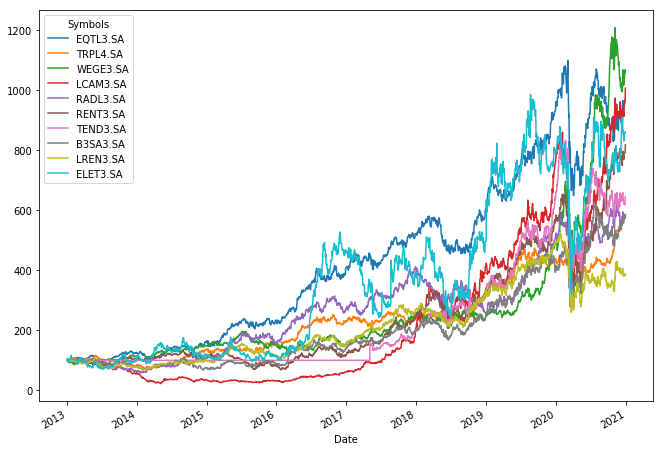

In [ ]:
plot_data = (select_return / select_return.iloc[0] * 100).plot(figsize = (11, 8))
plt.show()

### Alocação Eficiente

In [ ]:
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria * 252
cov_anual

Symbols,EQTL3.SA,TRPL4.SA,WEGE3.SA,LCAM3.SA,RADL3.SA,RENT3.SA,TEND3.SA,B3SA3.SA,LREN3.SA,ELET3.SA
Symbols,,,,,,,,,,
EQTL3.SA,0.075187,0.025988,0.029681,0.034841,0.024971,0.047957,0.027240,0.049919,0.046077,0.069389
TRPL4.SA,0.025988,0.066520,0.018273,0.028748,0.019189,0.034366,0.019564,0.037980,0.033006,0.056065
WEGE3.SA,0.029681,0.018273,0.104719,0.035368,0.034220,0.048444,0.033719,0.047322,0.044177,0.049606
LCAM3.SA,0.034841,0.028748,0.035368,0.218570,0.023328,0.079433,0.056180,0.049443,0.053655,0.065300
RADL3.SA,0.024971,0.019189,0.034220,0.023328,0.097737,0.042195,0.021509,0.040995,0.043826,0.046547
RENT3.SA,0.047957,0.034366,0.048444,0.079433,0.042195,0.168926,0.052221,0.081116,0.086243,0.092836
TEND3.SA,0.027240,0.019564,0.033719,0.056180,0.021509,0.052221,0.111917,0.044968,0.046424,0.051607
B3SA3.SA,0.049919,0.037980,0.047322,0.049443,0.040995,0.081116,0.044968,0.141140,0.074272,0.107962
LREN3.SA,0.046077,0.033006,0.044177,0.053655,0.043826,0.086243,0.046424,0.074272,0.131340,0.088788


In [ ]:
#Listas que receberão os valores do retorno da carteira, volatividade, peso e sharpe das ações
retorno_carteira = []
volatividade_carteira = []
peso_ações = []
indice_sharpe = []

In [ ]:
#Criação de uma simulação aleatória dde 500 mil carteiras
numero_ações = len(select)
numero_carteiras = 500000
np.random.seed(100)

In [ ]:
#Loop for para preencher as listas criadas anteriormente
for cada_carteira in range(numero_carteiras):
    peso = np.random.random(numero_ações)
    peso /= np.sum(peso)
    retorno = np.dot(peso, retorno_anual)
    volatividade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))
    sharpe = (retorno - selic) / volatividade
    
    retorno_carteira.append(retorno)
    volatividade_carteira.append(volatividade)
    indice_sharpe.append(sharpe)
    peso_ações.append(peso)

In [ ]:
#Criação de um dicionário com os dados
carteira = {'Retorno': retorno_carteira,
            'Volatividade': volatividade_carteira,
            'Índice de Sharpe': indice_sharpe}

for contar,acao in enumerate(select):
    carteira[acao+' Peso'] = [Peso[contar] for Peso in peso_ações]

#Transtormação do dicionário em um Dataframe    
df = pd.DataFrame(carteira)

df.columns = ['Retorno', 'Volatividade', 'Índice de Sharpe'] + [acao+' Peso' for acao in select]

In [ ]:
df.head()

,Retorno,Volatividade,Índice de Sharpe,EQTL3.SA Peso,TRPL4.SA Peso,WEGE3.SA Peso,LCAM3.SA Peso,RADL3.SA Peso,RENT3.SA Peso,TEND3.SA Peso,B3SA3.SA Peso,LREN3.SA Peso,ELET3.SA Peso
0,0.340607,0.259416,1.206968,0.122782,0.062898,0.095920,0.190877,0.001066,0.027469,0.151556,0.186601,0.030889,0.129942
1,0.312303,0.249890,1.139713,0.191005,0.044831,0.039715,0.023225,0.047080,0.209714,0.173939,0.036846,0.174913,0.058733
2,0.303014,0.224865,1.225244,0.104207,0.226909,0.197368,0.081132,0.042341,0.089996,0.001373,0.060932,0.192060,0.003682
3,0.318275,0.255427,1.138388,0.116849,0.117817,0.020517,0.074526,0.007117,0.173741,0.191402,0.011696,0.173767,0.112568
4,0.328672,0.248625,1.211350,0.151906,0.128931,0.119041,0.004182,0.042970,0.111439,0.157355,0.051290,0.058492,0.174394


### Gráfico da Fronteira Eficiente

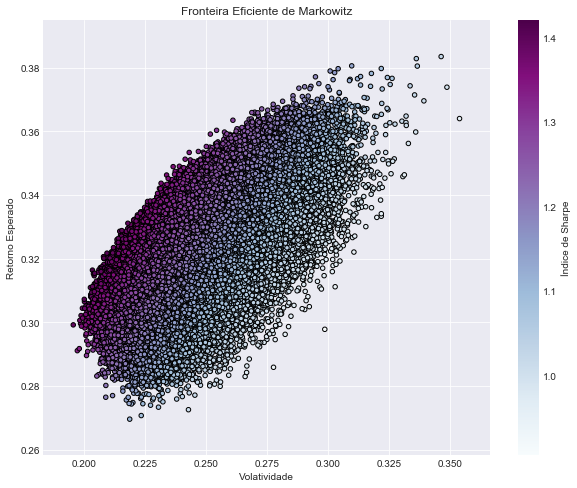

In [ ]:
plt.style.use('seaborn-dark')
df.plot.scatter(x = 'Volatividade', y = 'Retorno', c ='Índice de Sharpe', cmap = 'BuPu',
                 edgecolors = 'black', figsize = (10,8), grid = True)

plt.title('Fronteira Eficiente de Markowitz')
plt.xlabel('Volatividade')
plt.ylabel('Retorno Esperado')
plt.show()

### Portfólios Simulados

In [ ]:
portfolio = pd.DataFrame({'Retorno':retorno_carteira, 'Volatilidade': volatividade_carteira})
portfolio.head()

,Retorno,Volatilidade
0,0.340607,0.259416
1,0.312303,0.249890
2,0.303014,0.224865
3,0.318275,0.255427
4,0.328672,0.248625


In [ ]:
#Identificar maior Índice de Sharpe Simulado
menor_volatividade = df['Volatividade'].min()
maior_sharpe = df['Índice de Sharpe'].max()

In [ ]:
#Identificar carteira com maior Índice de Sharpe
carteira_sharpe = df.loc[df['Índice de Sharpe'] == maior_sharpe]
carteira_vol = df.loc[df['Volatividade'] == menor_volatividade]

In [ ]:
carteira_sharpe

,Retorno,Volatividade,Índice de Sharpe,EQTL3.SA Peso,TRPL4.SA Peso,WEGE3.SA Peso,LCAM3.SA Peso,RADL3.SA Peso,RENT3.SA Peso,TEND3.SA Peso,B3SA3.SA Peso,LREN3.SA Peso,ELET3.SA Peso
157803,0.31642,0.203403,1.420435,0.192351,0.182107,0.182081,0.09996,0.149836,0.003365,0.150567,0.003062,0.001,0.035671


In [ ]:
menor_volatividade

0.1955438593277157

In [ ]:
maior_sharpe

1.4204348497241952

In [ ]:
choice = carteira_sharpe

In [ ]:
choice

,Retorno,Volatividade,Índice de Sharpe,EQTL3.SA Peso,TRPL4.SA Peso,WEGE3.SA Peso,LCAM3.SA Peso,RADL3.SA Peso,RENT3.SA Peso,TEND3.SA Peso,B3SA3.SA Peso,LREN3.SA Peso,ELET3.SA Peso
157803,0.31642,0.203403,1.420435,0.192351,0.182107,0.182081,0.09996,0.149836,0.003365,0.150567,0.003062,0.001,0.035671


### Modelo de Machine Learning

In [ ]:
#Importação das bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [ ]:
#Importação dos dados da ação de interesse
wege = wb.get_data_yahoo('WEGE3.SA', start='2009-01-01', end= '2020-12-31')

In [ ]:
wege

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,1.937869,1.825443,1.846153,1.896449,638820.0,1.456278
2009-01-05,1.945266,1.834319,1.918639,1.943786,749684.0,1.492629
2009-01-06,1.989644,1.926035,1.926035,1.982248,1111344.0,1.522163
2009-01-07,1.973372,1.878698,1.964497,1.893491,592852.0,1.454007
2009-01-08,1.995562,1.927514,1.995562,1.954142,1207336.0,1.500580
...,...,...,...,...,...,...
2020-12-22,36.645000,36.044998,36.330002,36.410000,5199800.0,36.230171
2020-12-23,36.990002,36.200001,36.514999,36.310001,4806600.0,36.130669
2020-12-28,37.750000,36.474998,36.500000,37.750000,6838800.0,37.563553


In [ ]:
wege.dropna()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,1.937869,1.825443,1.846153,1.896449,638820.0,1.456278
2009-01-05,1.945266,1.834319,1.918639,1.943786,749684.0,1.492629
2009-01-06,1.989644,1.926035,1.926035,1.982248,1111344.0,1.522163
2009-01-07,1.973372,1.878698,1.964497,1.893491,592852.0,1.454007
2009-01-08,1.995562,1.927514,1.995562,1.954142,1207336.0,1.500580
...,...,...,...,...,...,...
2020-12-22,36.645000,36.044998,36.330002,36.410000,5199800.0,36.230171
2020-12-23,36.990002,36.200001,36.514999,36.310001,4806600.0,36.130669
2020-12-28,37.750000,36.474998,36.500000,37.750000,6838800.0,37.563553


In [ ]:
#criar nova coluna com o valor a ser predito

wege['Prediction'] = wege[['Adj Close']].shift(-1)
wege

,High,Low,Open,Close,Volume,Adj Close,Prediction
Date,,,,,,,
2009-01-02,1.937869,1.825443,1.846153,1.896449,638820.0,1.456278,1.492629
2009-01-05,1.945266,1.834319,1.918639,1.943786,749684.0,1.492629,1.522163
2009-01-06,1.989644,1.926035,1.926035,1.982248,1111344.0,1.522163,1.454007
2009-01-07,1.973372,1.878698,1.964497,1.893491,592852.0,1.454007,1.500580
2009-01-08,1.995562,1.927514,1.995562,1.954142,1207336.0,1.500580,1.483541
...,...,...,...,...,...,...,...
2020-12-22,36.645000,36.044998,36.330002,36.410000,5199800.0,36.230171,36.130669
2020-12-23,36.990002,36.200001,36.514999,36.310001,4806600.0,36.130669,37.563553
2020-12-28,37.750000,36.474998,36.500000,37.750000,6838800.0,37.563553,37.389416


In [ ]:
#tirar última linha com drobpna

wege_new = wege.reset_index()

wege_new['Prediction'] = wege_new[['Adj Close']].shift(-1)
wege_new.dropna(inplace=True)

In [ ]:
wege_new = wege_new.drop(columns=['Date'])
wege_new

,High,Low,Open,Close,Volume,Adj Close,Prediction
0,1.937869,1.825443,1.846153,1.896449,638820.0,1.456278,1.492629
1,1.945266,1.834319,1.918639,1.943786,749684.0,1.492629,1.522163
2,1.989644,1.926035,1.926035,1.982248,1111344.0,1.522163,1.454007
3,1.973372,1.878698,1.964497,1.893491,592852.0,1.454007,1.500580
4,1.995562,1.927514,1.995562,1.954142,1207336.0,1.500580,1.483541
...,...,...,...,...,...,...,...
2967,36.820000,35.299999,35.555000,36.005001,8072000.0,35.827175,36.230171
2968,36.645000,36.044998,36.330002,36.410000,5199800.0,36.230171,36.130669
2969,36.990002,36.200001,36.514999,36.310001,4806600.0,36.130669,37.563553
2970,37.750000,36.474998,36.500000,37.750000,6838800.0,37.563553,37.389416


In [ ]:
# Tirar coluna Close da analise

wege_new = wege_new.drop(columns=['Close'])
wege_new

,High,Low,Open,Volume,Adj Close,Prediction
0,1.937869,1.825443,1.846153,638820.0,1.456278,1.492629
1,1.945266,1.834319,1.918639,749684.0,1.492629,1.522163
2,1.989644,1.926035,1.926035,1111344.0,1.522163,1.454007
3,1.973372,1.878698,1.964497,592852.0,1.454007,1.500580
4,1.995562,1.927514,1.995562,1207336.0,1.500580,1.483541
...,...,...,...,...,...,...
2967,36.820000,35.299999,35.555000,8072000.0,35.827175,36.230171
2968,36.645000,36.044998,36.330002,5199800.0,36.230171,36.130669
2969,36.990002,36.200001,36.514999,4806600.0,36.130669,37.563553
2970,37.750000,36.474998,36.500000,6838800.0,37.563553,37.389416


In [ ]:
#Divisão do regressor e dos previsores
X = wege_new.iloc[:,0:5]
y = wege_new.iloc[:, 5]

In [ ]:
#Divisão da base de dados para treinamento e para teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y,test_size = 0.3,random_state = 0)

In [ ]:
#Treinamento do modelo
regressor = LinearRegression()
model = regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, y_treinamento)

In [ ]:
previsoes = regressor.predict(X_teste)

In [ ]:
#Mensuração da qualidade do modelo
score

0.9986187253393549

In [ ]:
#Comparação entre os valores preditos e reais
previsoes = pd.DataFrame(previsoes)
y_teste_2 = pd.DataFrame(y_teste)
x = y_teste_2.reset_index(drop= True).join(previsoes)
x.columns = ['Real', 'Previsto']
x


,Real,Previsto
0,5.687592,5.719152
1,5.629550,5.603912
2,9.336075,9.307281
3,9.453127,9.424388
4,4.643285,4.680116
...,...,...
887,5.211444,5.243088
888,5.199057,5.216635
889,31.063244,32.242969
890,6.964597,7.083017


### Validação do Modelo

In [ ]:
#Importação das Bibliotecas
import statsmodels.api as sm 
import scipy.stats as stats

In [ ]:
#Treinamento e impressão de resultados
X_sm = sm.add_constant(X_treinamento)
results = sm.OLS(y_treinamento, X_sm).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Prediction   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.999e+05
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:46:08   Log-Likelihood:                -225.35
No. Observations:                2080   AIC:                             462.7
Df Residuals:                    2074   BIC:                             496.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0762      0.023     -3.248      0.0

In [ ]:
#Criação de novo modelo sem variáveis não validadas
X_train = X_treinamento.drop(columns=['High'])
y_train = y_treinamento.drop(columns=['High'])

In [ ]:
#Treinamento e impressão de Resultados do novo modelo
X_sm = sm.add_constant(X_train)
results = sm.OLS(y_train, X_sm).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Prediction   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.750e+05
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:46:08   Log-Likelihood:                -225.35
No. Observations:                2080   AIC:                             460.7
Df Residuals:                    2075   BIC:                             488.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0752      0.021     -3.616      0.0

In [ ]:
#Criação de novo modelo sem variáveis não validadas
X_train_2 = X_train.drop(columns=['Open'])
y_train_2 = y_train.drop(columns=['Open'])

In [ ]:
#Treinamento e impressão de Resultados
X_sm = sm.add_constant(X_train_2)
results = sm.OLS(y_train_2, X_sm).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Prediction   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.996e+05
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:46:09   Log-Likelihood:                -226.69
No. Observations:                2080   AIC:                             461.4
Df Residuals:                    2076   BIC:                             483.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0692      0.020     -3.377      0.0

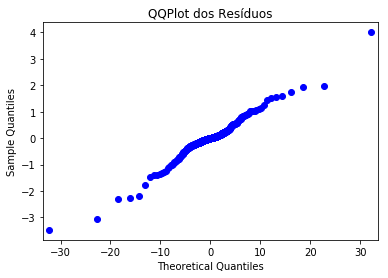

In [ ]:
#Construção do QQPlot

res =  results.resid
fig = sm.qqplot(res, stats.t, distargs=(2,))
plt.title('QQPlot dos Resíduos')
plt.show()

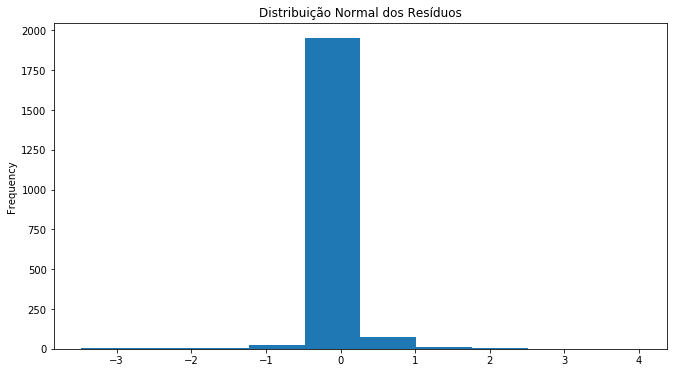

In [ ]:
#Construção da Distribuição Normal
res.plot(kind='hist', figsize=(11,6))
plt.title('Distribuição Normal dos Resíduos')
plt.show()

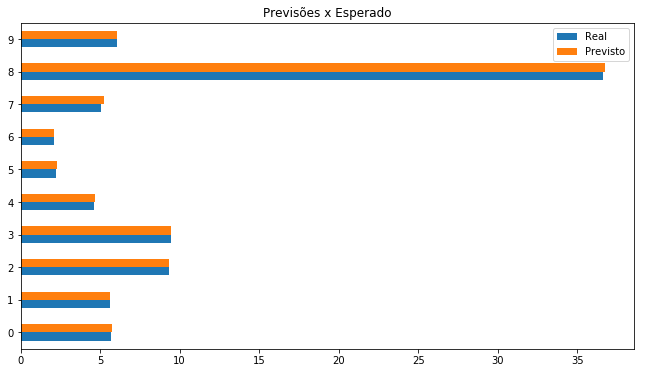

In [ ]:
#Construção do Gráfico de comparação entre as variáveis
x.head(10).plot(kind='barh', figsize=(11,6))
plt.title('Previsões x Esperado')
plt.show()